<a href="https://colab.research.google.com/github/R-driste/3.3.1_for_5.13.23/blob/main/NINTENDO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Setup File and Initial Df**

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

nintendo_df = pd.read_csv('data.csv') #downloaded from https://www.kaggle.com/datasets/mrmorj/nintendo-games-dataset

headers =  ["Meta Score","Title","Platform","Date","User Score","Link","Esrb Rating","Developers","Genres"]
nintendo_df.columns = headers
nintendo_df = nintendo_df.dropna()

nintendo_df

,Meta Score,Title,Platform,Date,User Score,Link,Esrb Rating,Developers,Genres
2,66.0,Fitness Boxing 2: Rhythm & Exercise,Switch,"Dec 4, 2020",6.2,/game/switch/fitness-boxing-2-rhythm-exercise,E,"['Nintendo', ' Imagineer Co.', 'Ltd.']","['Miscellaneous', 'Exercise / Fitness']"
3,63.0,Fire Emblem: Shadow Dragon & the Blade of Light,Switch,"Dec 4, 2020",7.6,/game/switch/fire-emblem-shadow-dragon-the-bla...,E,['Intelligent Systems'],"['Strategy', 'Turn-Based', 'Tactics']"
4,79.0,Hyrule Warriors: Age of Calamity,Switch,"Nov 20, 2020",8.1,/game/switch/hyrule-warriors-age-of-calamity,T,"['Omega Force', ' Koei Tecmo Games']","['Action', ""Beat-'Em-Up"", '3D']"
7,85.0,Pikmin 3 Deluxe,Switch,"Oct 30, 2020",8.4,/game/switch/pikmin-3-deluxe,E10+,"['Eighting', ' Nintendo']","['Strategy', 'Real-Time', 'General']"
8,79.0,Part Time UFO,Switch,"Oct 28, 2020",7.3,/game/switch/part-time-ufo,E10+,['HAL Labs'],"['Action', 'Arcade']"
...,...,...,...,...,...,...,...,...,...
998,90.0,Blast Corps,N64,"Feb 28, 1997",8.4,/game/nintendo-64/blast-corps,E,['Rare Ltd.'],"['Action', 'General']"
999,83.0,Mario Kart 64,N64,"Feb 10, 1997",8.6,/game/nintendo-64/mario-kart-64,E,['Nintendo'],"['Driving', 'Racing', 'Kart']"
1000,92.0,Wave Race 64,N64,"Nov 1, 1996",8.3,/game/nintendo-64/wave-race-64,E,['Nintendo'],"['Driving', 'Racing', 'Snow / Water']"
1001,80.0,Pilotwings 64,N64,"Sep 29, 1996",8.0,/game/nintendo-64/pilotwings-64,E,['Paradigm Entertainment'],"['Simulation', 'General']"


# **Issues RecogNized uPoN aNalysis of the data**

1. (a) The geNres are iNside lists iNstead of iN striNgs (b) The lists are stored as strings 🏴

2. There's duplicate genres 🎌

3. (a) Quotes inside quotes 🏁

In [115]:
#solution to flag 1(b) 🏴
ignore_strings = ['[',"]" ,","]
def string_to_list(string):
    string = string.replace(' ', '')
    wordgoing = True
    word_list = []
    word = ''
    for i in range(len(string)):
        if (i == (len(string) - 1)):
            pass
        elif string[i] == "'":
          wordgoing = not wordgoing
          if wordgoing == True:
            word_list.append(word.strip())
            word = ""
        elif (string[i] in ignore_strings):
            pass
        else:
            word += string[i]

    #solution to flag 2 🎌
    word_list = list(set(word_list))

    return word_list

#solution to flag 1(a) 🏴
def expand_lists(column_name, df, reference_df):
  col_index = reference_df.columns.get_loc(column_name)
  for row in reference_df.values:
      cat_items = string_to_list(row[col_index])
      for item in cat_items:
        new_row = row.tolist()
        new_row[col_index] = item
        new_data = pd.DataFrame([new_row], columns=headers)
        df = pd.concat([df, new_data], ignore_index=True)
  
  return df

# **Adjust to expand the Genres**

In [187]:
#fix flag 3 🏁
nintendo_df['Genres'] = nintendo_df['Genres'].replace({"\"Beat-'Em-Up\"": "'Beat-Em-Up'", "\"Shoot-'Em-Up\"": "'Shoot-Em-Up'"})


#fix flags 1 and 2
genre_df = pd.DataFrame()
genre_df = expand_lists('Genres', genre_df, nintendo_df)
genre_focus = genre_df.groupby('Genres').mean().reset_index()

dev_df = pd.DataFrame()
dev_df = expand_lists('Developers', dev_df, nintendo_df)
dev_focus = dev_df.groupby('Developers').mean().reset_index()

<ipython-input-187-d185f439fa52>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  genre_focus = genre_df.groupby('Genres').mean().reset_index()
<ipython-input-187-d185f439fa52>:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dev_focus = dev_df.groupby('Developers').mean().reset_index()


# **Hypothesis** 🤔

**Now we can form our prediction of which Genre ✈**

Developers: Nintendo, Bandai Namco, Pokemon

Genres: Third Person RPG, Party, Kart

Rating: E


# **Graph Time!**

In [195]:
g_vs_u = genre_focus.sort_values('User Score')
g_vs_m = genre_focus.sort_values('Meta Score')
d_vs_u = dev_focus.sort_values('User Score')
d_vs_m = dev_focus.sort_values('Meta Score')

g vs u

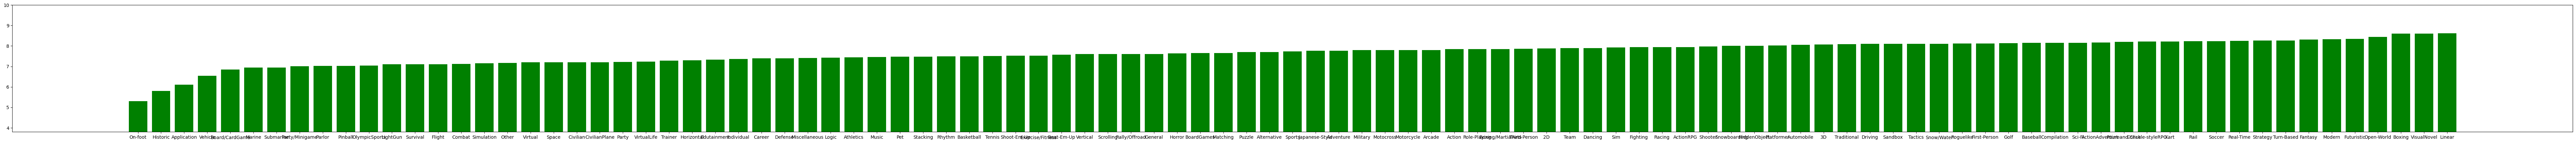

In [199]:
low = nintendo_df['User Score'].min()
plt.rcParams['figure.figsize'] = [100,5]
plt.bar('Genres','User Score', data=g_vs_u, color="green")
plt.ylim(low, 10)
plt.show()

g vs m

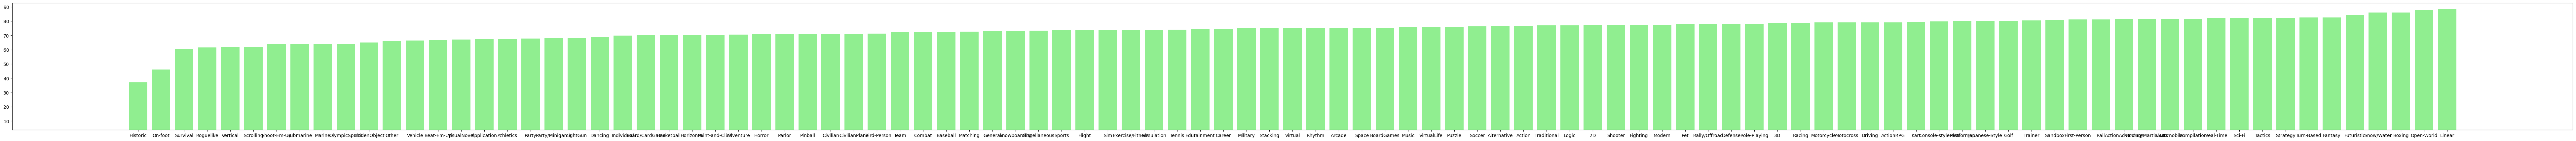

In [206]:
low = nintendo_df['User Score'].min()
plt.rcParams['figure.figsize'] = [100,5]
plt.bar('Genres','Meta Score', data=g_vs_m, color="lightgreen")
plt.ylim(low)
plt.show()

d vs u

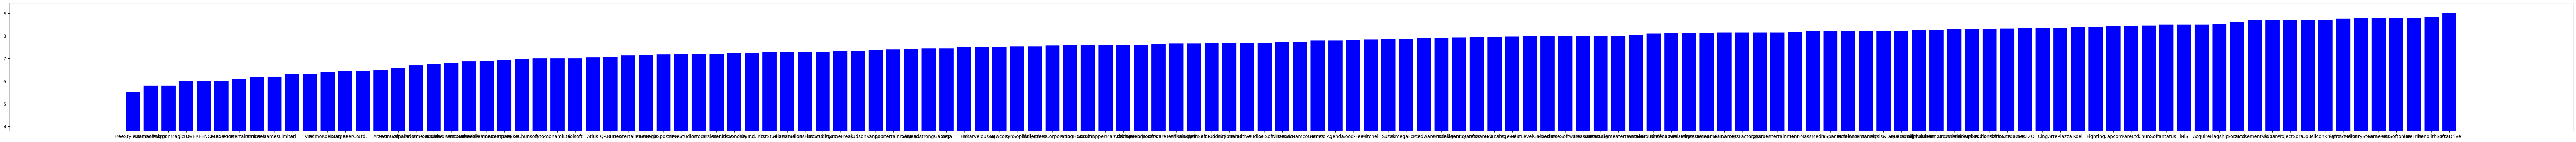

In [208]:
low = nintendo_df['User Score'].min()
plt.rcParams['figure.figsize'] = [100,5]
plt.bar('Developers','User Score', data=d_vs_u, color="blue")
plt.ylim(low)
plt.show()

d vs m

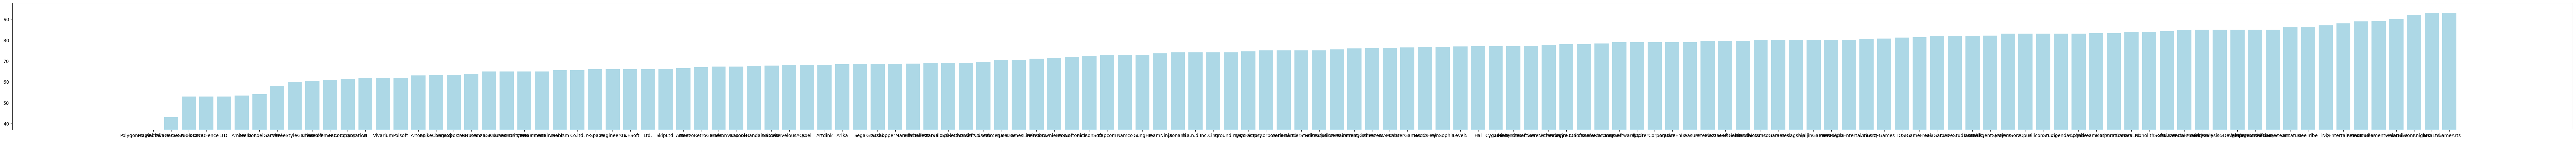

In [210]:
low = nintendo_df['Meta Score'].min()
plt.rcParams['figure.figsize'] = [100,5]
plt.bar('Developers','Meta Score', data=d_vs_m, color="lightblue")
plt.ylim(low)
plt.show()